# Problem Set 6

See [Visualization Rules](https://datascience.quantecon.org/../applications/visualization_rules.html) and [Regression](https://datascience.quantecon.org/../applications/regression.html)

In [1]:
! pip install patsy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import patsy
import sklearn
import sklearn.model_selection
import sklearn.ensemble

%matplotlib inline

This problem set uses data on insuree characteristics and medical costs. This is a public domain dataset downloaded from [kaggle](https://www.kaggle.com/mirichoi0218/insurance). 

The variables in the data are:
- age: age of primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: Body mass index of primary beneficiary
- children: Number of children covered by health insurance / Number of dependents
- smoker: whether primary beneficiary smokes
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: medical costs billed by health insurance

You will build a  model to predict charges given the other variables in the data. 


In [2]:
insure = pd.read_csv("https://raw.githubusercontent.com/doctor-phil/ECON323_2023_Spring/main/problem_sets/insurance.csv")
insure.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Questions 1-3

These question are intentionally open-ended. For each one, carefully choose the type of visualization you’ll create. Put some effort into choosing colors, labels, and other formatting.

### Question 1

Create a visualization showing the relationship between smoking and medical costs. 

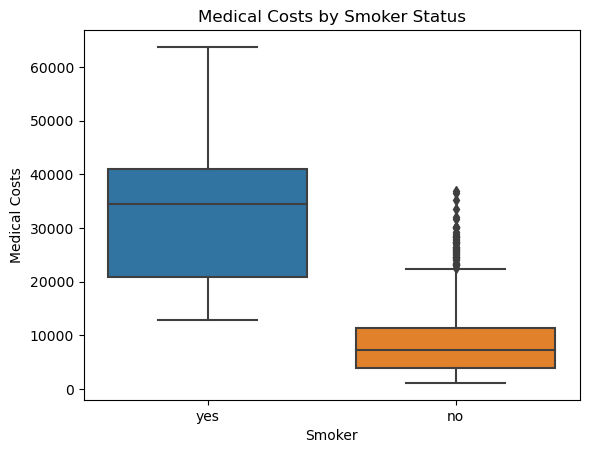

In [4]:
import seaborn as sns

sns.boxplot(x="smoker", y="charges", data=insure)

# Set plot title and axis labels
plt.title("Medical Costs by Smoker Status")
plt.xlabel("Smoker")
plt.ylabel("Medical Costs")

# Show plot
plt.show()


### Question 2

Create a visualization showing the relationship between BMI and medical costs. 

Text(0, 0.5, 'Medical Costs')

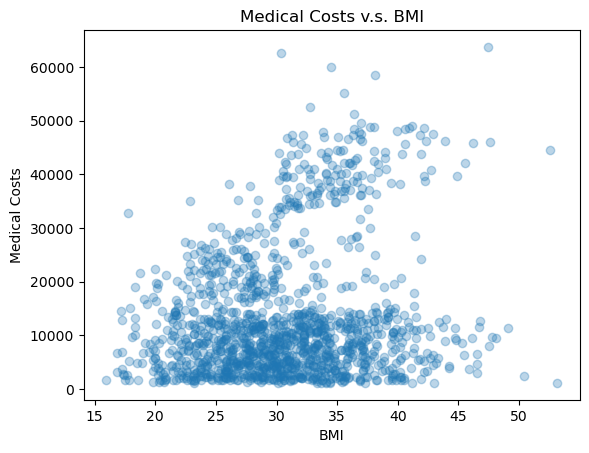

In [22]:
fig, ax = plt.subplots()
x = insure.bmi
y = insure.charges
ax.scatter(x, y, alpha=0.3)
plt.title("Medical Costs v.s. BMI")
plt.xlabel("BMI")
plt.ylabel("Medical Costs")

### Question 3

Does the relationship between medical costs and BMI vary with gender? Create a visualization to answer this question.

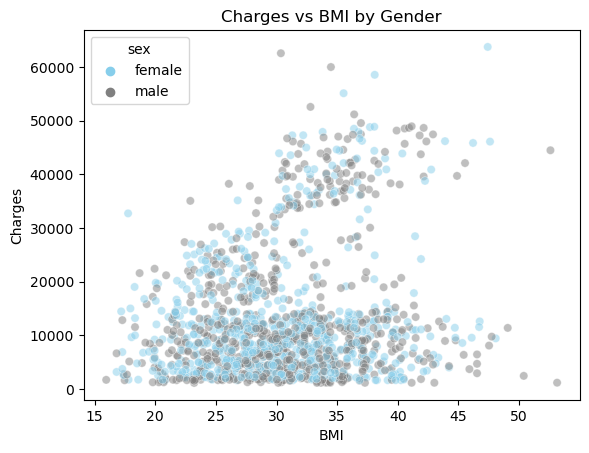

In [25]:
colors = {'male': 'grey', 'female': 'skyblue'}

sns.scatterplot(x="bmi", y="charges", hue="sex",palette=colors, alpha = 0.5, data=insure)
# Set plot title and axis labels
plt.title("Charges vs BMI by Gender")
plt.xlabel("BMI")
plt.ylabel("Charges")

# Show plot
plt.show()

No, the relationship between medical costs and BMI doesn't vary with gender. Because as the colored scatter plot shown as above, the grey points relating to "male" while the blue points relating to "female", it't observed that the distribution and locations of grey points and blue points are similar to each other. To this extent, we don't deem that medical costs and BMI vary with gender.

## Questions 4-7

In these questions you will build and evaluate a model to predict medical costs. 

First, we divide the data into training and testing sets. 

In [19]:
train = insure.sample(frac = 0.8,random_state = 42) 
test = insure.drop(train.index)

Now we create a numeric matrix of features from our dataframe. The formula interface from the patsy package is one convenient method for doing this.

In [20]:
y, X = patsy.dmatrices("charges ~ C(sex)*(age + children + C(smoker) + C(region)) + age:C(smoker)", insure, return_type='matrix')
y = y.flatten()
y_train = y[train.index]
X_train = X[train.index]
y_test = y[test.index]
X_test = X[test.index]

### Question 4

Fit a linear regression model to the training data. Print the MSE on the training and testing data.

In [31]:
# import
from sklearn import linear_model

# construct the model instance
mc_lr_model = linear_model.LinearRegression()

# fit the model
mc_lr_model.fit(X_train, y_train)

LinearRegression()

In [57]:
# MSE on the training
trian_MSE = sklearn.metrics.mean_squared_error(y_train, mc_lr_model.predict(X_train))
# MSE on the testing
test_MSE = sklearn.metrics.mean_squared_error(y_test, mc_lr_model.predict(X_test))

print(f"For the linear regression moel, Mean squared error on training data: {trian_MSE:.2f}")
print(f"Mean squared error on testing data: {test_MSE:.2f}")

For the linear regression moel, Mean squared error on training data: 38781234.25
Mean squared error on testing data: 45740307.02


### Question 5

Fit a LASSO model to the training data. Follow along with the notes on regression to visualize the lasso path. `alpha`. Print the MSE on the training and testing data.

In [42]:
mc_lasso_model = linear_model.Lasso()
mc_lasso_model.fit(X_train, y_train)

from itertools import cycle
alphas = np.exp(np.linspace(10, -2, 50))
alphas, coefs_lasso, _ = linear_model.lasso_path(X_train, y_train, alphas=alphas, max_iter=10000)


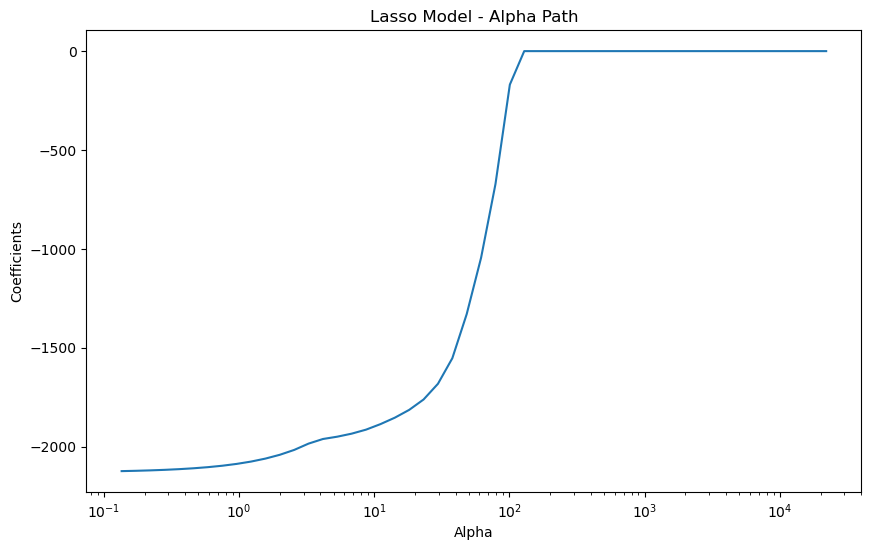

In [51]:
# # plotting
# fig, ax = plt.subplots(figsize=(12, 8))
color_cycle = cycle(colors)
# log_alphas = -np.log10(alphas)
# for coef_l, c, name in zip(coefs_lasso, color_cycle, list(X)):
#    ax.plot(log_alphas, coef_l, c=c)
#    ax.set_xlabel('-Log(alpha)')
#    ax.set_ylabel('lasso coefficients')
#    ax.set_title('Lasso Path')
#    ax.axis('tight')
#    maxabs = np.max(np.abs(coef_l))
#    i = [idx for idx in range(len(coef_l)) if abs(coef_l[idx]) >= (0.9*maxabs)][0]
#    xnote = log_alphas[i]
#    ynote = coef_l[i]
#    ax.annotate(name, (xnote, ynote), color=c)


# Extract alpha values and corresponding coefficients
# alphas = mc_lasso_model.alphas_
# coefs = mc_lasso_model.coef_

# Plot alpha path
plt.figure(figsize=(10, 6))
plt.plot(alphas, coefs_lasso[0,])
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso Model - Alpha Path')
plt.axis('tight')
plt.show()

In [58]:
# MSE on the training
lasso_trian_MSE = sklearn.metrics.mean_squared_error(y_train, mc_lasso_model.predict(X_train))
# MSE on the testing
lasso_test_MSE = sklearn.metrics.mean_squared_error(y_test, mc_lasso_model.predict(X_test))

print(f"For the Lasso Model, Mean squared error on training data: {lasso_trian_MSE:.2f}")
print(f"Mean squared error on testing data: {lasso_test_MSE:.2f}")

For the Lasso Model, Mean squared error on training data: 38781549.54
Mean squared error on testing data: 45709751.07


### Question 6

Estimate a regression tree using the training, data with maximum depth of 3 layers. Set the `random_state` keyword argument to `123`. Report the mean-square error on the training and testing samples as a formatted string. 

Then estimate a regression tree with a maximum depth of 10, and the same value of `random_state` and report its MSE on the test data in the same way.

Which model had a higher MSE on the testing data? Explain why you think this might be.

In [56]:
tr_model = sklearn.tree.DecisionTreeRegressor(max_depth=3, random_state=123)
tr_model.fit(X_train, y_train)

tr_train_MSE = sklearn.metrics.mean_squared_error(y_train, tr_model.predict(X_train))
tr_test_MSE = sklearn.metrics.mean_squared_error(y_test, tr_model.predict(X_test))

print(f"For the regression tree model, Mean squared error on training data: {tr_train_MSE:.2f}")
print(f"Mean squared error on testing data: {tr_test_MSE:.2f}")

For regression tree model, Mean squared error on training data: 38704066.58
Mean squared error on testing data: 47497522.99


The regression tree model had a higher MSE on the testing data with around 47497522.99. It's observed taht the regression tree comparabaly had lower MSE on the training data than the other two moedels which may imply that the regression tree model may overfit the training set such that the MSE on the testing data was even worse.

### Question 7

Perform k-fold cross-validation on the $\alpha$ parameter in your lasso regression, with $k$ equal to `5`. What is the optimal value of $\alpha$ that it chooses? Compare that value of $\alpha$ to the visualization from question 5. How many of your variables have parameters at this level of $\alpha$?

In [60]:
lasso_cv = linear_model.LassoCV(cv=5).fit(X_train,y_train)
print(f"The optimal alpha value: {lasso_cv.alpha_:.2f}")

The optimal alpha value: 159.70
